##HOMEWORK 2 ASSIGNMENT
KNN classification using Iris dataset 

##1. Implement KNN classification, using the sklearn package. 
See also: 
http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

In [29]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
#from seaborn import plt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score

In [30]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df['Target'] = iris.target
print 'iris data head:'
print iris_df.head()
print 'iris describe():'
print iris_df.describe()

print "label set: " + repr(iris_df['Target'].unique())

iris data head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  
iris describe():
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000      

In [31]:
iris_df.plot

<bound method DataFrame.plot_frame of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5            

In [40]:
n_neighbors = range(1, 51, 2)
print n_neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [36]:
X = iris.data
y = iris.target
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5).fit(X, y)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [37]:
# Create the training (and test) set using scikit-learn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [38]:
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    
    # clf = classifier (for classification model)
    
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

print scores
print len(X_train)
print len(y_train)
print X_train


[0.93333333333333335, 0.93333333333333335, 0.9555555555555556, 0.97777777777777775, 0.9555555555555556, 0.93333333333333335, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.91111111111111109, 0.93333333333333335, 0.9555555555555556, 0.9555555555555556, 0.93333333333333335, 0.93333333333333335, 0.91111111111111109, 0.91111111111111109, 0.91111111111111109, 0.91111111111111109, 0.88888888888888884, 0.91111111111111109, 0.91111111111111109, 0.88888888888888884, 0.88888888888888884]
105
105
[[ 5.   3.3  1.4  0.2]
 [ 5.   3.5  1.6  0.6]
 [ 5.   3.5  1.3  0.3]
 [ 6.9  3.1  5.4  2.1]
 [ 6.4  2.7  5.3  1.9]
 [ 5.7  2.5  5.   2. ]
 [ 7.9  3.8  6.4  2. ]
 [ 5.   3.   1.6  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 6.   2.2  4.   1. ]
 [ 5.5  2.4  3.8  1.1]
 [ 4.9  2.4  3.3  1. ]
 [ 4.8  3.4  1.6  0.2]
 [ 5.   3.2  1.2  0.2]
 [ 6.7  3.   5.   1.7]
 [ 6.3  3.3  6.   2.5]
 [ 5.4  3.9  1.7  0.4]
 [ 5.7  2.8  4.1  1.3]
 [ 6.   3.   4.8  1.8]
 [ 5.7  2.6  3.5  1. ]
 [ 4.8  3.4  1

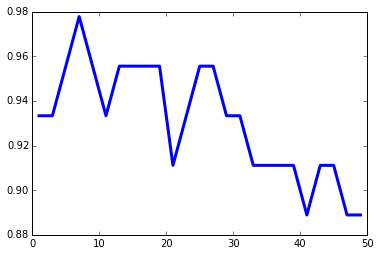

In [41]:
plt.plot(n_neighbors, scores, linewidth=3.0);

##2. Use the sklearn package to implement cross-validation for your classifier. 
Use 5 folds for your cross-validation. 
See also: http://scikit-learn.org/stable/modules/cross_validation.html#

In [42]:
iris.data.shape, iris.target.shape
from sklearn.cross_validation import cross_val_score
clf = neighbors.KNeighborsClassifier(11, weights='uniform')
clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris_df.values, iris.target, cv=5)
print scores

n_neighbors = range(1, 150, 30)
print n_neighbors

[ 1.  1.  1.  1.  1.]
[1, 31, 61, 91, 121]


##3. Use your KNN classifier and cross-validation code from (1) and (2) above to determine the optimal value of K (number of nearest neighbors to consult) for this Iris dataset. 
Hint: This hyperparameter will be a number between 1 and 150 :)

